<a href="https://colab.research.google.com/github/ttq693/cs711_team1/blob/master/Team1_cs711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports for running the project
import os 
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression

Mounting the Git repository data


In [ ]:
!git clone https://github.com/ttq693/CS711_team1.git

fatal: destination path 'CS711_team1' already exists and is not an empty directory.


Exploring the data !!

In [ ]:
# We are reading the CSV file into the data Frame
train_df = pd.read_csv('/content/CS711_team1/train_FD001.txt/train_FD001.txt',sep = " ",header = None)
test_df = pd.read_csv('/content/CS711_team1/test_FD001.txt/test_FD001.txt',sep = " ",header = None)
y_test = pd.read_csv('/content/CS711_team1/RUL_FD001.txt', sep="\s+", header=None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


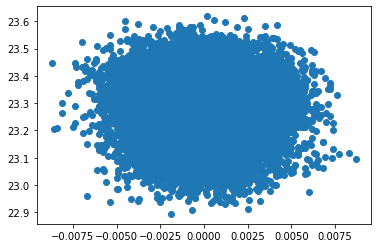

In [ ]:
# Checking for outliers between 2 and 25
plt.scatter(train_df[2],train_df[25])

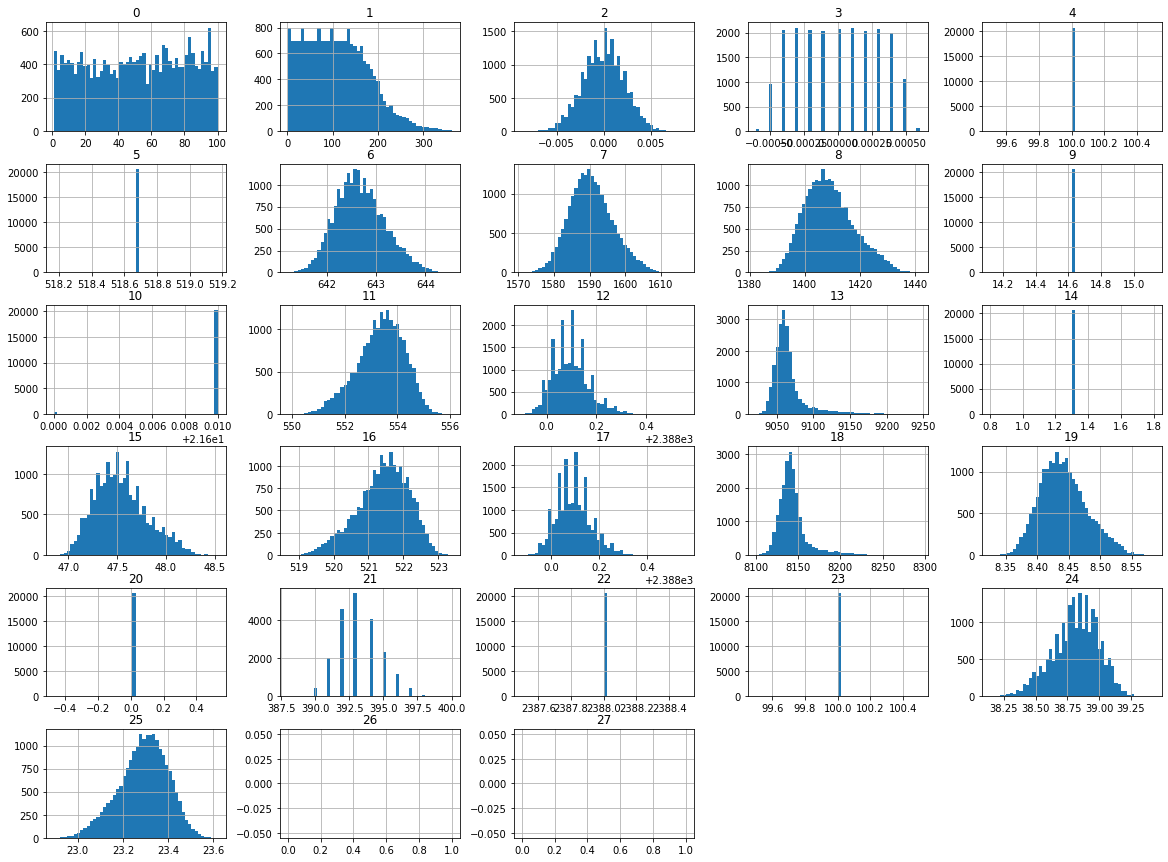

In [ ]:
#	By visualizing graphs, we can identify the strongly and zero variance columns in the dataset
# Other insights regarding the changing pattern can also be observed by visualization

train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# We have dropped all the columns which were having NAN values
train_df=train_df.drop([26 , 27], axis = 1) 

In [ ]:
# we have rename all the column name.
train_df.columns =['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [ ]:
train_df.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Preprocess the data

In [ ]:
# we have first enter two column which name is unit  and cycles. and find max of cycles then max minus cycles.. 
def addingrul(df):
  rul = pd.DataFrame(df.groupby('unit')['cycles'].max()).reset_index()
  rul.columns = ['unit','max']
  df = df.merge(rul,on = 'unit',how = 'left')
  df['rul'] = df['max'] - df['cycles']
  df = df.drop(['max'],axis = 1)
  return df

train_df = addingrul(train_df)
train_df.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
# We have dropped all the columns which were having NAN values from test_df data set
test_df=test_df.drop([26 , 27], axis = 1)

In [ ]:
#we have rename all the column name from test_df data set
test_df.columns =['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

In [ ]:
test_df.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
#we have call the function which use to make new rul column which use to find remaning useful life cycles from test_df data set
test_df = addingrul(test_df)

In [ ]:
test_df.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,26


plotting the histogram

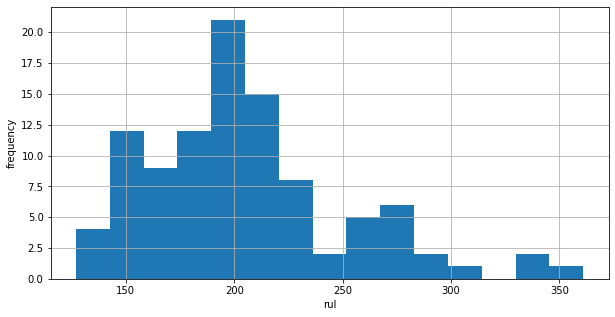

In [ ]:
df_max_rul = train_df[['unit', 'rul']].groupby('unit').max().reset_index()
plt.ylabel('frequency')
plt.xlabel('rul')
df_max_rul['rul'].hist(bins=15, figsize=(10,5))
plt.show()

plot signals of each sensor

In [ ]:
def plotting(sensors):
    plt.figure(figsize=(10,7))
    for j in train_df['unit'].unique():
        if (j % 10 == 0): 
            plt.plot('rul', sensors, 
                     data=train_df[train_df['unit']==j])
    plt.xticks(np.arange(0, 250, 25))
    plt.xlim(200, 0)  
    plt.xlabel('RUL')
    plt.ylabel(sensors)
    plt.show()

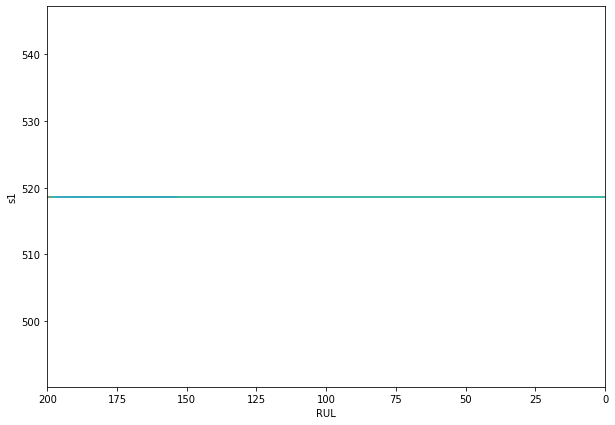

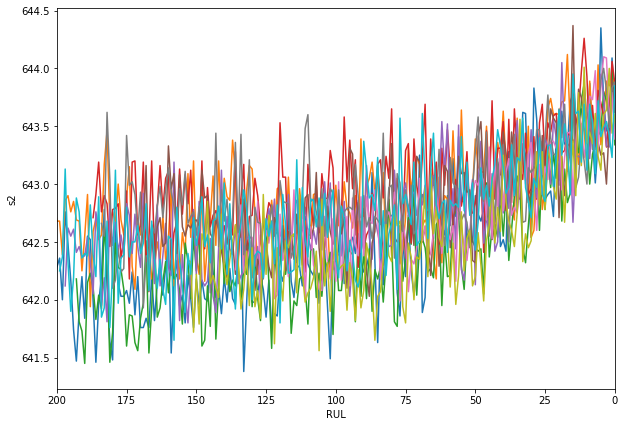

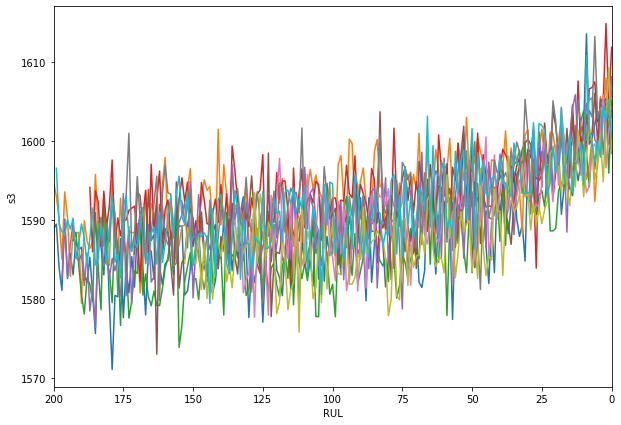

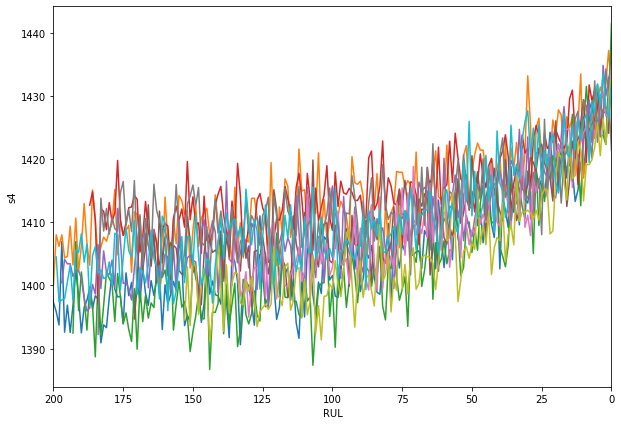

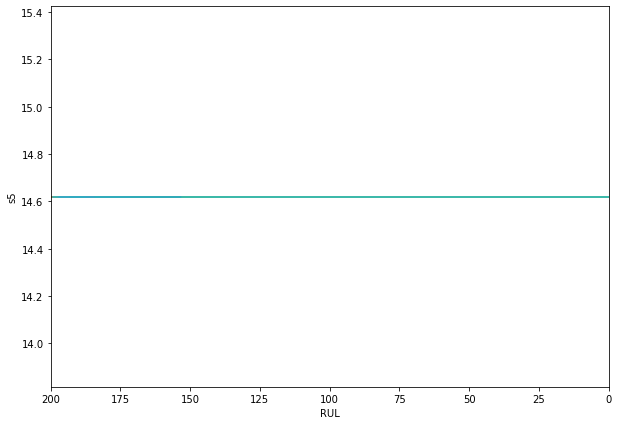

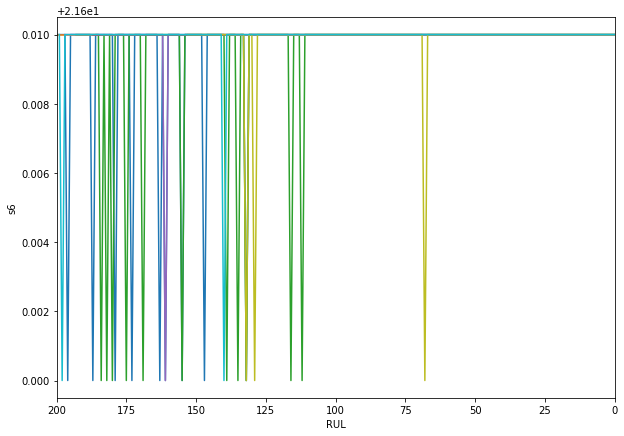

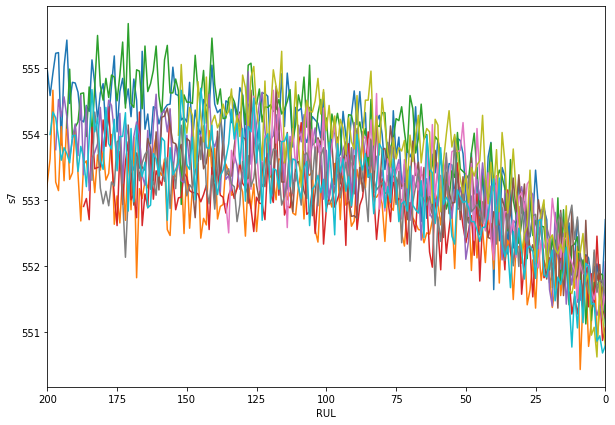

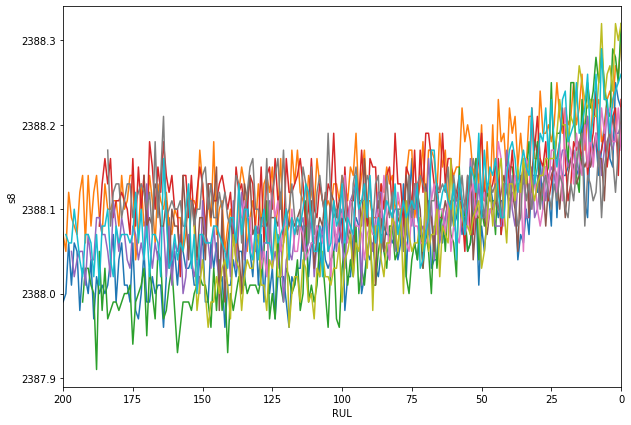

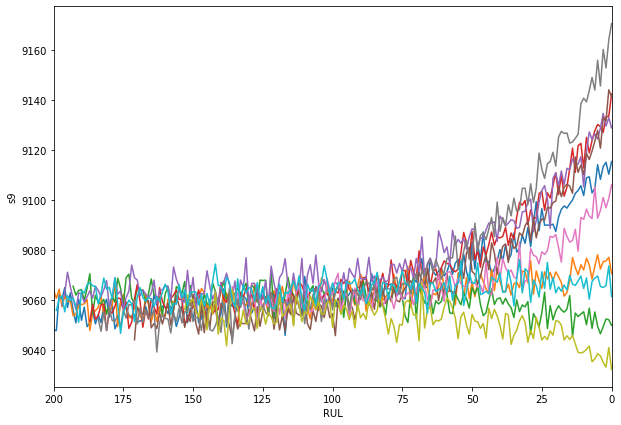

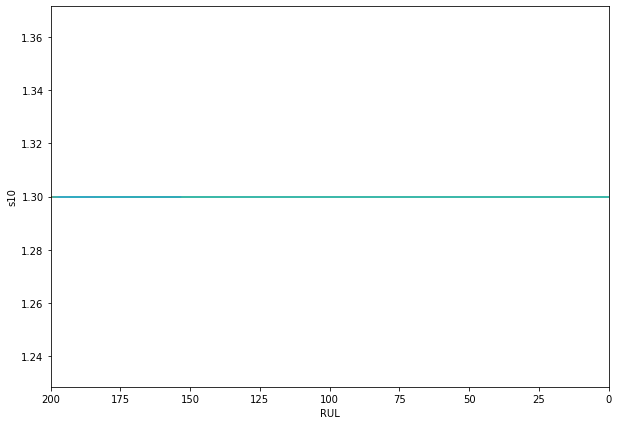

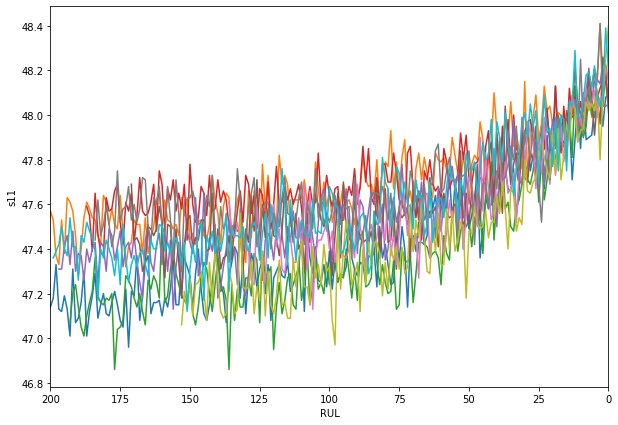

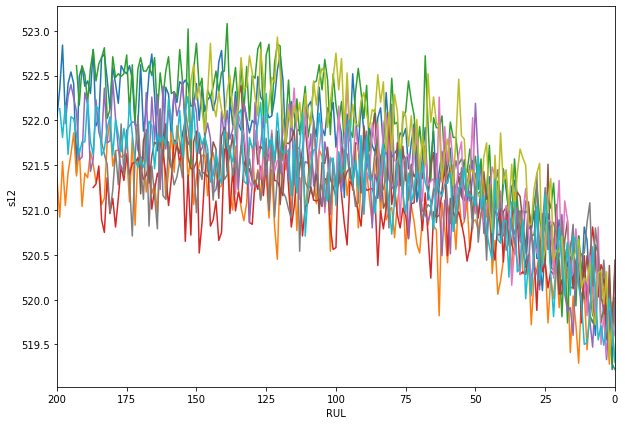

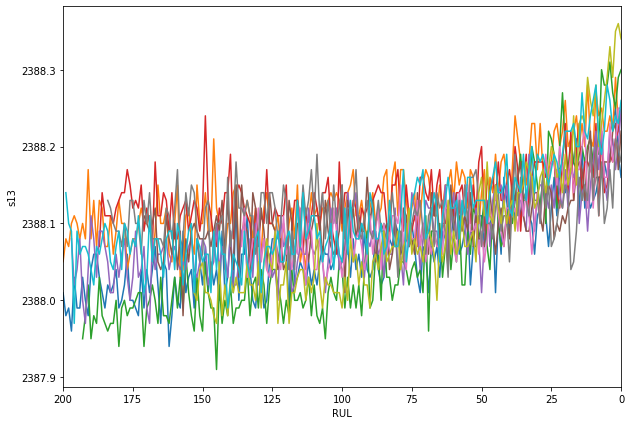

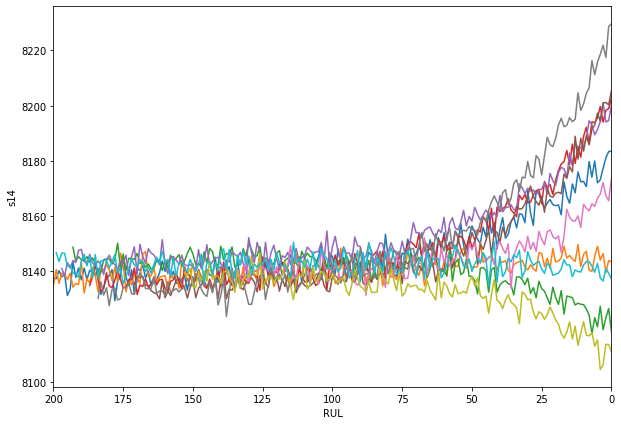

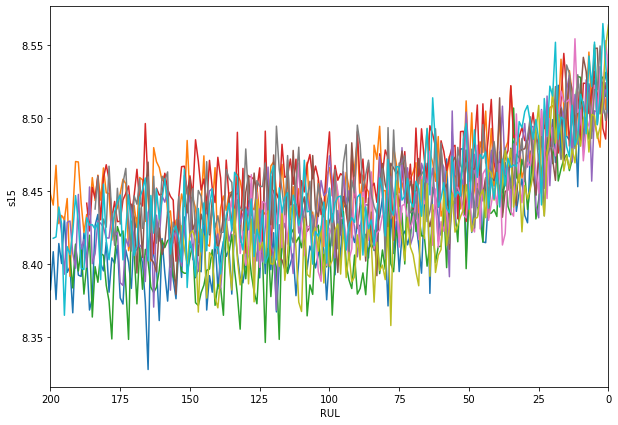

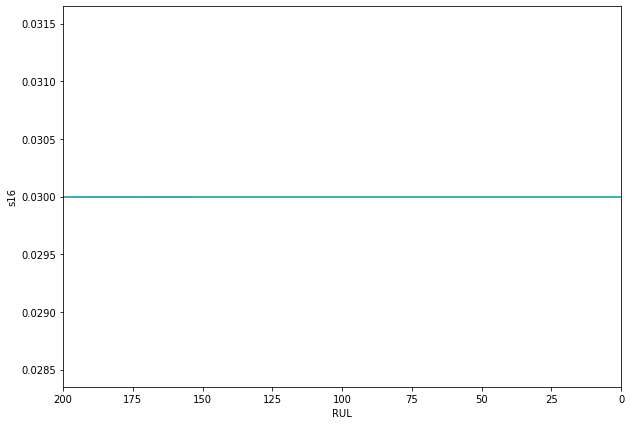

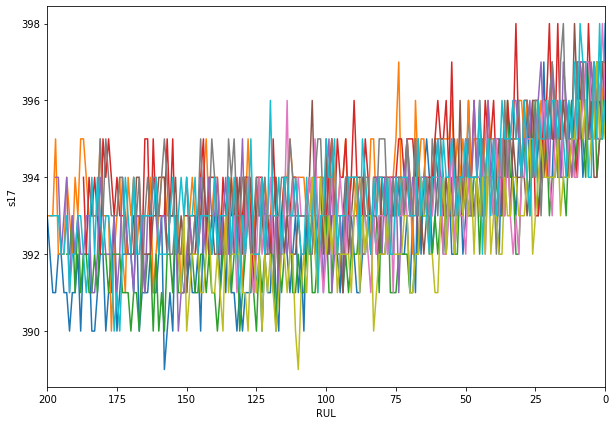

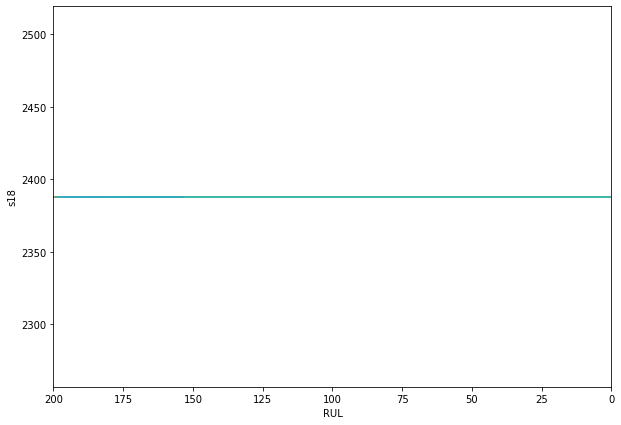

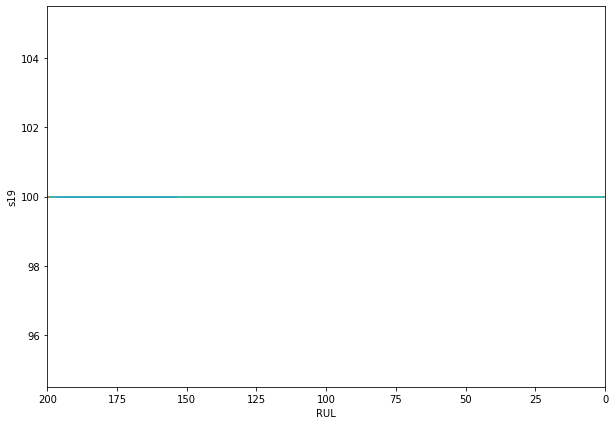

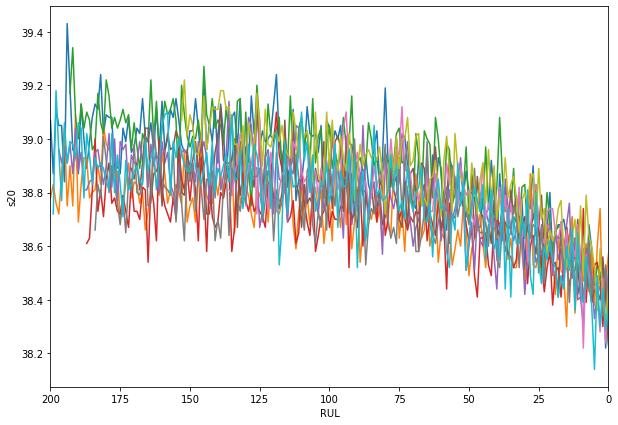

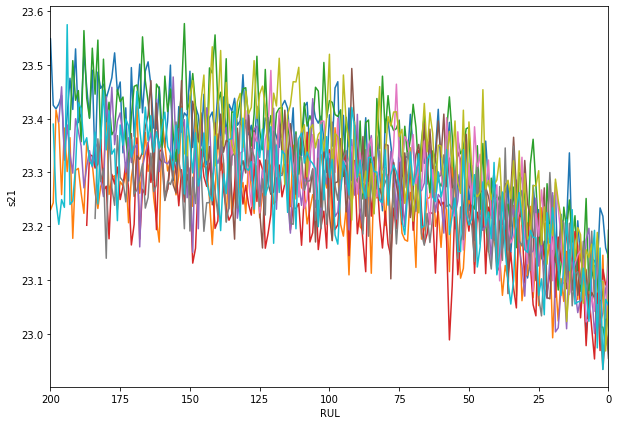

In [ ]:
sensor1 = ["s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]
for s20 in sensor1:
    plotting(s20)

In [ ]:
# we make a new function which name is std_drop , this fu() is use to drop all the column which values of standard devation is less then threshold 0.0001.
thd = 0.0001
def standarddrop(frame):
  frame = frame.drop(frame.std()[abs(frame.std()) < thd].index.values, axis=1)
  frame.head()
  return frame

train_df=standarddrop(train_df)
train_df.head()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [ ]:
#we have call the fu() to do same thing with test_df, of droping column which values of std() is less then threshold.
test_df=standarddrop(test_df)
test_df.head()

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,29
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,28
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,27
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,26


In [ ]:
#we have make new function corr, which is use to find the correlation between the all the column.
#then we make a set of all column, and use the 'for' loop to find the correlation between all column.
#then we make threshold of 0.9, we delete all those column which correlation grater then 0.9 .
#list(train_df.columns.values.tolist())
def corr(db, thd):
  col1 = set()
  matrix1 = db.corr()
  for x in range(len(matrix1.columns)):#
      for y in range(x):#
        if x != y:#
          if (matrix1.iloc[x, y] >= thd) and (matrix1.columns[y] not in col1):#
            colname = matrix1.columns[x] # getting the name of column#
            col1.add(colname)#
            if colname in col1:#
              print(colname)
              del db[colname] # deleting the column from the dataset
  return db
train_df=corr(train_df,0.9)
train_df.head()

s14


,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [ ]:
#we use the same corr function here for test_df
test_df=corr(test_df,0.8)
test_df.head()

s14


,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,30
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,29
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,28
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,27
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,26


In [ ]:
# Normalise the data using Minmax scalar given in the sklearn preprocessing from cycles to RUL, RUL not included use slicing operation for both test and train
# Normalise both the train set and test set 
scaler = preprocessing.MinMaxScaler()
def scaleCol(dataf, colsscale):
     for column in colsscale:
         dataf[column] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(dataf[column])),columns=[column])
     return dataf
scaled_df = scaleCol(train_df,["op_setting1",	"op_setting2",	"s2",	"s3",	"s4",	"s6",	"s7",	"s8",	"s9",	"s11",	"s12",	"s13",	"s15",	"s17",	"s20",	"s21"])
train_df

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,1.0,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.656791,0.750000,0.271318,0.109500,4
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,1.0,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.727203,0.583333,0.124031,0.366197,3
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,1.0,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,1.0,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.823394,0.583333,0.116279,0.234466,1


In [ ]:
scaled_df = scaleCol(test_df,["op_setting1",	"op_setting2",	"s2",	"s3",	"s4",	"s6",	"s7",	"s8",	"s9",	"s11",	"s12",	"s13",	"s15",	"s17",	"s20",	"s21"])
test_df

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,1.0,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.347076,0.375,0.500000,0.620099,30
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,1.0,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.227709,0.500,0.645455,0.645718,29
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,1.0,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.533557,0.500,0.700000,0.681104,28
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,1.0,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.282359,0.250,0.627273,0.620382,27
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,1.0,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.337009,0.125,0.618182,0.676008,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,1.0,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.664909,0.625,0.309091,0.370842,4
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,1.0,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.567593,0.750,0.236364,0.483652,3
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,1.0,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.594919,0.750,0.281818,0.381741,2
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,1.0,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,0.662991,0.750,0.318182,0.473461,1


In [ ]:
#we append new column TTF(time to faliure)
#This is the final preprocessing step TIME TO FALIURE T T F 
train_df['TTF'] = train_df['rul']
def ffTTF(dt,s):
    return(dt.TTF[s]-dt.TTF.min()) / float(dt.TTF.max()-dt.TTF.min())
Fz = []
fT = []

for a in range(train_df['unit'].min(),train_df['unit'].max()+1):
    dt=train_df[train_df.unit==a]
    dt = dt.reset_index(drop=True)
    for s in range(len(dt)):
        Fz = ffTTF(dt, s)
        fT.append(Fz)
train_df['rul'] = fT
print(train_df.head())

   unit  cycles  op_setting1  op_setting2        s2        s3        s4   s6  \
0     1       1     0.459770     0.166667  0.183735  0.406802  0.309757  1.0   
1     1       2     0.609195     0.250000  0.283133  0.453019  0.352633  1.0   
2     1       3     0.252874     0.750000  0.343373  0.369523  0.370527  1.0   
3     1       4     0.540230     0.500000  0.343373  0.256159  0.331195  1.0   
4     1       5     0.390805     0.333333  0.349398  0.257467  0.404625  1.0   

         s7        s8        s9       s11       s12       s13       s15  \
0  0.726248  0.242424  0.109755  0.369048  0.633262  0.205882  0.363986   
1  0.628019  0.212121  0.100242  0.380952  0.765458  0.279412  0.411312   
2  0.710145  0.272727  0.140043  0.250000  0.795309  0.220588  0.357445   
3  0.740741  0.318182  0.124518  0.166667  0.889126  0.294118  0.166603   
4  0.668277  0.242424  0.149960  0.255952  0.746269  0.235294  0.402078   

        s17       s20       s21       rul  TTF  
0  0.333333  0.7131

In [ ]:

print(len(train_df.columns))
print(len(test_df.columns))
train_df.head()

20
19


,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul,TTF
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,1.000000,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,0.994764,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,0.989529,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,0.984293,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,0.979058,187


In [ ]:
#vectorize the data ,data converted in array
Train_X = train_df.values[:,1:18]
Train_Y = train_df.values[:,18]
Test_X = test_df.values[:,1:18]

In [ ]:
Train_X

array([[1.00000000e+00, 4.59770115e-01, 1.66666667e-01, ...,
        3.33333333e-01, 7.13178295e-01, 7.24661696e-01],
       [2.00000000e+00, 6.09195402e-01, 2.50000000e-01, ...,
        3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
       [3.00000000e+00, 2.52873563e-01, 7.50000000e-01, ...,
        1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
       ...,
       [1.98000000e+02, 5.22988506e-01, 5.00000000e-01, ...,
        8.33333333e-01, 2.32558140e-01, 5.39906103e-02],
       [1.99000000e+02, 4.36781609e-01, 7.50000000e-01, ...,
        5.83333333e-01, 1.16279070e-01, 2.34465617e-01],
       [2.00000000e+02, 3.16091954e-01, 8.33333333e-02, ...,
        6.66666667e-01, 1.78294574e-01, 2.18171776e-01]])

life to death cycles =  100


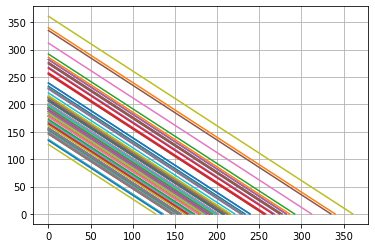

In [ ]:
#How many life-to-death cycles do we have and what do they look like?
how = len(train_df[train_df['TTF'] == 0])
listt = []
for y,j in train_df.iterrows():
    rul = j['TTF']
    listt.append(rul)
    if rul == 0:
        plt.plot(listt)
        listt = []
print("life to death cycles = ",how)
plt.grid()

In [ ]:
def check(x, y, label='test'):
    meanse = mean_squared_error(x, y)
    rootmse = np.sqrt(meanse)
    vari = r2_score(x, y)
    print('Here,{} set RootMeanSquareError:{}, and, R2:{}'.format(label, rootmse, vari))

In [ ]:
train_df

,unit,cycles,op_setting1,op_setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s15,s17,s20,s21,rul,TTF
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.363986,0.333333,0.713178,0.724662,1.000000,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014,0.994764,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375,0.989529,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386,0.984293,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502,0.979058,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,1.0,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.656791,0.750000,0.271318,0.109500,0.020101,4
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,1.0,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.727203,0.583333,0.124031,0.366197,0.015075,3
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,1.0,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.922278,0.833333,0.232558,0.053991,0.010050,2
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,1.0,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.823394,0.583333,0.116279,0.234466,0.005025,1


In [ ]:
sensor_names = ["s2",	"s3",	"s4",	"s6",	"s7",	"s8",	"s9",	"s11",	"s12",	"s13",	"s15",	"s17",	"s20",	"s21"]
index_names = ['unit', 'cycles']
setting_names = ['op_setting1', 'op_setting2']
ruma = ['rul']
drop_sensors = ['s6']
lab = ['maxpredcycles','maxcycles','RUL','score']
drop_trainlabels = index_names+setting_names+ruma+drop_sensors
drop_testlabels = index_names+setting_names+ruma+drop_sensors
trainx = train_df.drop(drop_trainlabels, axis=1)
trainy = trainx.pop('TTF')
testlr = test_df.groupby('unit').last().reset_index().drop(drop_testlabels, axis=1)


In [ ]:
lr = LinearRegression()
lr.fit(trainx, trainy)


ytrain = lr.predict(trainx)
check(trainy, ytrain, 'train')

ytest = lr.predict(testlr)
check(y_test, ytest)

Here,train set RootMeanSquareError:44.685763377137135, and, R2:0.5791177107952368
Here,test set RootMeanSquareError:40.53797028447046, and, R2:0.04837803920770245
